## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [9]:
import os
import tensorflow.keras as keras

os.environ["CUDA_VISIBLE_DEVICES"] = '0'

In [10]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [11]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 1s 5ms/step - loss: 2.2894 - accuracy: 0.1479 - val_loss: 2.2088 - val_accuracy: 0.2183
Epoch 2/500
196/196 [==============================] - 1s 4ms/step - loss: 2.1936 - accuracy: 0.2294 - val_loss: 2.1472 - val_accuracy: 0.2452
Epoch 3/500
196/196 [==============================] - 1s 4ms/step - loss: 2.1374 - accuracy: 0.2577 - val_loss: 2.0964 - val_accuracy: 0.2831
Epoch 4/500
196/196 [==============================] - 1s 4ms/step - loss: 2.0908 - accuracy: 0.2756 - val_loss: 2.0551 - val_accuracy: 0.2942
Epoch 5/500
196/196 [==============================] - 1s 4ms/step - loss: 2.0498 - accuracy: 0.2902 - val_loss: 2.0193 - val_accuracy: 0.2993
Epoch 6/500
196/196 [==============================] - 1s 4ms/step - loss: 2.0126 - accuracy: 0.3040 - val_loss: 1.9895 - val_accuracy: 0.3106
Epoch 7/500
196/196 [==============================] - 1s 4ms/step - loss: 1.9800 - accuracy: 0.3171 - val_loss: 1.9642 - val_accuracy: 0.3156

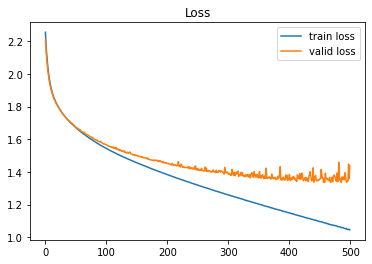

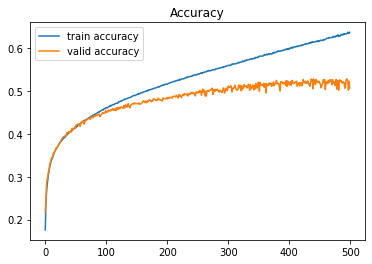

In [15]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()